# Pandas

## What is Pandas?

Pandas is a python library used for the manipulation and analysis of data. If you have ever done anything with tabular data in python, chances are that you have encountered this package. Some of the features that we will learn include reading and writing data, slicing and subsetting, merging and joining, and filling in missing data.

The official documentation for pandas can be found [here](http://pandas.pydata.org/pandas-docs/stable/) and is a great resource if you encounter something that you do not understand or would like to reference. 


In [94]:
import pandas as pd
import numpy as np

## Pandas Series and DataFrame

Pandas has two main data structures -- the Pandas Series and the Pandas DataFrame. In essence, Pandas Series are 1 dimensional while DataFrames are 2 dimensional. Let's take a look at some examples:

In [95]:
series = pd.Series(data = range(10, 20))
series

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [96]:
series.index

RangeIndex(start=0, stop=10, step=1)

In [97]:
series.index = range(30, 40)
series

30    10
31    11
32    12
33    13
34    14
35    15
36    16
37    17
38    18
39    19
dtype: int64

In [98]:
series.index = ['a', 'b', 'c', 'd', 'e']*2
series

a    10
b    11
c    12
d    13
e    14
a    15
b    16
c    17
d    18
e    19
dtype: int64

In [99]:
series['a']

a    10
a    15
dtype: int64

In [101]:
series.is_unique

True

In [102]:
series.is_monotonic

True

In [103]:
daterange_index = pd.date_range('01/01/2016', periods = 10, freq = "D")
daterange_index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [104]:
series.index = daterange_index
series

2016-01-01    10
2016-01-02    11
2016-01-03    12
2016-01-04    13
2016-01-05    14
2016-01-06    15
2016-01-07    16
2016-01-08    17
2016-01-09    18
2016-01-10    19
Freq: D, dtype: int64

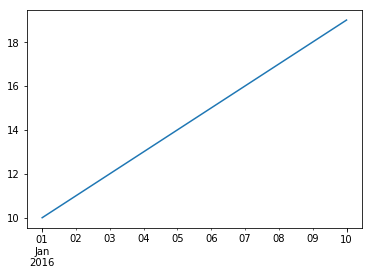

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
series.plot()


### Series are like `ndarrays`

In [106]:
series.mean()

14.5

In [107]:
series[series > 13]

2016-01-05    14
2016-01-06    15
2016-01-07    16
2016-01-08    17
2016-01-09    18
2016-01-10    19
Freq: D, dtype: int64

## Series are also like python dictionaries

In [ ]:
series = pd.Series({'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e':14, 'f':15, 'g':16})
series

In [108]:
series['e']

KeyError: 'e'

In [109]:
'g' in series

False

In [110]:
'h' in series

False

In [111]:
series['h'] = 27
'h' in series

True

In [29]:
series

a    10
b    11
c    12
d    13
e    14
f    15
g    16
h    27
dtype: int64

For a full list of pandas.Series methods and attributes, see the documentation here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

## pd.DataFrame

You can think of a DataFrame as a 2-dimensional table. Pandas Dataframes can be created from Series, python dictionaries of lists, Series, `ndarrays` and many other ways. You can also read data from disk directly into dataframes (the most common method)

In [30]:
df = pd.DataFrame(series)
df

,0
a,10
b,11
c,12
d,13
e,14
f,15
g,16
h,27


In [31]:
df = pd.DataFrame({'A': [1,2,3], 'B': [4,5,6], 'C':7})
df

,A,B,C
0,1,4,7
1,2,5,7
2,3,6,7


In [32]:
df = pd.DataFrame.from_dict([{'A': 1, 'B':2, 'C':3}, {'A': 2, 'B':3, 'C':4}, {'A':5, 'B':4, 'C':'hello'}])

In [33]:
df

,A,B,C
0,1,2,3
1,2,3,4
2,5,4,hello


In [34]:
df.dtypes

A     int64
B     int64
C    object
dtype: object

In [35]:
hrrp_df = pd.read_csv("./data/Hospital_Readmissions_Reduction_Program.csv")

## Exploring the data

In [36]:
hrrp_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,810,NaN,0.9875,14.9136,15.1026,120,07/01/2013,06/30/2016
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,275,NaN,1.0499,13.3154,12.6826,38,07/01/2013,06/30/2016
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,617,NaN,0.9891,18.2801,18.4823,112,07/01/2013,06/30/2016
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1053,NaN,0.9506,20.1391,21.1865,209,07/01/2013,06/30/2016
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,342,NaN,1.1004,5.3174,4.8322,20,07/01/2013,06/30/2016


In [37]:
hrrp_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
19825,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,670120,TX,READM-30-CABG-HRRP,Not Available,5.0,Not Available,Not Available,Not Available,Not Available,07/01/2013,06/30/2016
19826,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,670120,TX,READM-30-COPD-HRRP,Not Available,5.0,Not Available,Not Available,Not Available,Not Available,07/01/2013,06/30/2016
19827,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,670120,TX,READM-30-HF-HRRP,Not Available,5.0,Not Available,Not Available,Not Available,Not Available,07/01/2013,06/30/2016
19828,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,670120,TX,READM-30-HIP-KNEE-HRRP,Not Available,5.0,Not Available,Not Available,Not Available,Not Available,07/01/2013,06/30/2016
19829,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,670120,TX,READM-30-PN-HRRP,Not Available,5.0,Not Available,Not Available,Not Available,Not Available,07/01/2013,06/30/2016


In [38]:
hrrp_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [39]:
hrrp_df.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges           object
Footnote                      float64
Excess Readmission Ratio       object
Predicted Readmission Rate     object
Expected Readmission Rate      object
Number of Readmissions         object
Start Date                     object
End Date                       object
dtype: object

In [40]:
hrrp_df['Number of Discharges']

0                  810
1                  275
2                  617
3                 1053
4                  342
5                  656
6        Not Available
7        Not Available
8                  627
9                  362
10                 263
11                 841
12                 395
13                 147
14                 693
15                 885
16                 411
17                 942
18       Not Available
19       Not Available
20                 137
21                  98
22       Not Available
23                 197
24       Not Available
25       Not Available
26       Not Available
27       Not Available
28       Not Available
29       Not Available
             ...      
19800    Not Available
19801    Not Available
19802    Not Available
19803    Not Available
19804    Not Available
19805    Not Available
19806    Not Available
19807    Not Available
19808    Not Available
19809    Not Available
19810    Not Available
19811    Not Available
19812    No

In [41]:
hrrp_df['Number of Discharges'].value_counts()

Not Available    8072
0                 120
119                40
115                39
102                37
135                37
101                37
107                37
200                36
121                36
177                36
166                35
186                35
91                 34
100                34
116                34
133                34
93                 33
103                33
97                 33
182                33
130                32
163                32
165                32
125                32
156                32
136                32
76                 32
258                31
85                 31
                 ... 
742                 1
2618                1
2408                1
1087                1
1470                1
1771                1
2417                1
1034                1
1037                1
2036                1
948                 1
963                 1
1007                1
1766                1
903       

In [42]:
hrrp_df.count()

Hospital Name                 19830
Provider Number               19830
State                         19830
Measure Name                  19830
Number of Discharges          19830
Footnote                       5435
Excess Readmission Ratio      19830
Predicted Readmission Rate    19830
Expected Readmission Rate     19830
Number of Readmissions        19830
Start Date                    19830
End Date                      19830
dtype: int64

In [43]:
{column:hrrp_df[column].value_counts() for column in hrrp_df}

{'Hospital Name': MEMORIAL HOSPITAL                                   54
 GOOD SAMARITAN HOSPITAL                             42
 ST JOSEPH HOSPITAL                                  36
 ST JOSEPH MEDICAL CENTER                            36
 ST MARY MEDICAL CENTER                              24
 MERCY HOSPITAL                                      24
 ST FRANCIS HOSPITAL                                 24
 MERCY MEDICAL CENTER                                24
 ST MARY'S MEDICAL CENTER                            24
 ST JOSEPHS HOSPITAL                                 18
 MEMORIAL MEDICAL CENTER                             18
 MERCY REGIONAL MEDICAL CENTER                       18
 COVENANT MEDICAL CENTER                             18
 WAYNE MEMORIAL HOSPITAL                             18
 METHODIST HOSPITAL                                  18
 NORTHWEST MEDICAL CENTER                            18
 MARION GENERAL HOSPITAL                             18
 GOOD SAMARITAN MEDICAL CENTER 

In [44]:
hrrp_df.replace({'Not Available':np.nan, 'Too Few to Report': 0}, inplace = True)


In [45]:
hrrp_df.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges           object
Footnote                      float64
Excess Readmission Ratio       object
Predicted Readmission Rate     object
Expected Readmission Rate      object
Number of Readmissions         object
Start Date                     object
End Date                       object
dtype: object

In [46]:
hrrp_df['Number of Discharges'] = pd.to_numeric(hrrp_df['Number of Discharges'])

In [47]:
hrrp_df.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges          float64
Footnote                      float64
Excess Readmission Ratio       object
Predicted Readmission Rate     object
Expected Readmission Rate      object
Number of Readmissions         object
Start Date                     object
End Date                       object
dtype: object

In [48]:
hrrp_df = hrrp_df.apply(pd.to_numeric, errors = 'ignore')

In [49]:
hrrp_df.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges          float64
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions        float64
Start Date                     object
End Date                       object
dtype: object

In [50]:
hrrp_df['Start Date'] = pd.to_datetime(hrrp_df['Start Date'])

In [51]:
hrrp_df['End Date'] = pd.to_datetime(hrrp_df['End Date'], format = '%m/%d/%Y')

In [52]:
hrrp_df.dtypes

Hospital Name                         object
Provider Number                        int64
State                                 object
Measure Name                          object
Number of Discharges                 float64
Footnote                             float64
Excess Readmission Ratio             float64
Predicted Readmission Rate           float64
Expected Readmission Rate            float64
Number of Readmissions               float64
Start Date                    datetime64[ns]
End Date                      datetime64[ns]
dtype: object

In [53]:
hrrp_df['Start Date'].min()

Timestamp('2013-07-01 00:00:00')

In [54]:
hrrp_df['Start Date'].max()

Timestamp('2013-07-01 00:00:00')

## Describe()

In [55]:
hrrp_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,19830.000000,11758.000000,5435.000000,14411.000000,14411.000000,14411.000000,14411.000000
mean,263534.966112,383.487838,3.725299,1.002733,15.788274,15.740896,50.786621
std,162506.488765,346.575866,2.214852,0.089900,5.919024,5.730920,59.588550
min,10001.000000,0.000000,1.000000,0.561200,2.330600,2.722500,0.000000
25%,110125.000000,157.000000,1.000000,0.949300,13.849050,14.188250,14.000000
50%,250124.000000,285.000000,5.000000,0.997100,17.161900,17.133600,32.000000
75%,390139.000000,499.000000,5.000000,1.050100,19.858900,19.893250,69.000000
max,670120.000000,8355.000000,23.000000,1.729300,31.855700,27.148600,962.000000


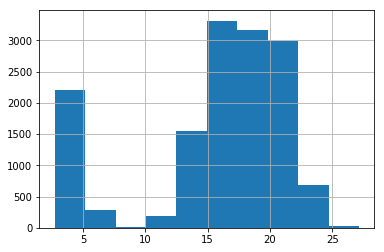

In [56]:
hrrp_df['Expected Readmission Rate'].hist()

## Sorting

In [57]:
hrrp_df.sort_values('Predicted Readmission Rate', ascending = False)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8817,SINAI-GRACE HOSPITAL,230024,MI,READM-30-HF-HRRP,692.0,NaN,1.2566,31.8557,25.3497,236.0,2013-07-01,2016-06-30
7281,HARLAN ARH HOSPITAL,180050,KY,READM-30-HF-HRRP,250.0,NaN,1.4113,31.2880,22.1698,101.0,2013-07-01,2016-06-30
11578,BROOKLYN HOSPITAL CENTER AT DOWNTOWN CAMPUS,330056,NY,READM-30-HF-HRRP,224.0,NaN,1.3377,30.6993,22.9487,88.0,2013-07-01,2016-06-30
7246,MEMORIAL HOSPITAL,180043,KY,READM-30-HF-HRRP,136.0,NaN,1.1518,30.4929,26.4746,51.0,2013-07-01,2016-06-30
3567,UNIVERSITY OF MIAMI HOSPITAL,100009,FL,READM-30-HF-HRRP,597.0,NaN,1.1747,29.8541,25.4144,189.0,2013-07-01,2016-06-30
3741,HIALEAH HOSPITAL,100053,FL,READM-30-HF-HRRP,304.0,NaN,1.1945,29.3454,24.5667,101.0,2013-07-01,2016-06-30
2793,CENTINELA HOSPITAL MEDICAL CENTER,50739,CA,READM-30-HF-HRRP,729.0,NaN,1.1968,28.9589,24.1975,223.0,2013-07-01,2016-06-30
10059,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HF-HRRP,566.0,NaN,1.2303,28.6948,23.3229,176.0,2013-07-01,2016-06-30
1881,GLENDALE ADVENTIST MEDICAL CENTER,50239,CA,READM-30-HF-HRRP,680.0,NaN,1.1861,28.6461,24.1511,206.0,2013-07-01,2016-06-30
11967,KINGSBROOK JEWISH MEDICAL CENTER,330201,NY,READM-30-HF-HRRP,241.0,NaN,1.1637,28.6255,24.5989,79.0,2013-07-01,2016-06-30


In [58]:
hrrp_df.sort_values(['Number of Discharges', 'Excess Readmission Ratio'], ascending = [False, True])

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
12184,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,8355.0,NaN,0.7023,3.0225,4.3036,246.0,2013-07-01,2016-06-30
8644,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,4988.0,NaN,0.7286,2.8837,3.9580,138.0,2013-07-01,2016-06-30
3555,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3679.0,NaN,1.1746,25.8711,22.0252,962.0,2013-07-01,2016-06-30
3557,FLORIDA HOSPITAL,100007,FL,READM-30-PN-HRRP,3536.0,NaN,1.0951,18.7702,17.1405,669.0,2013-07-01,2016-06-30
8603,"SOUTHCOAST HOSPITAL GROUP, INC",220074,MA,READM-30-PN-HRRP,3451.0,NaN,1.1887,20.5974,17.3270,721.0,2013-07-01,2016-06-30
5351,EVANSTON HOSPITAL,140010,IL,READM-30-PN-HRRP,3107.0,NaN,0.9819,15.8683,16.1602,492.0,2013-07-01,2016-06-30
3460,"CHRISTIANA CARE HEALTH SERVICES, INC.",80001,DE,READM-30-HIP-KNEE-HRRP,3078.0,NaN,0.7840,3.5262,4.4975,104.0,2013-07-01,2016-06-30
2914,HOAG ORTHOPEDIC INSTITUTE,50769,CA,READM-30-HIP-KNEE-HRRP,3073.0,NaN,0.5612,2.3306,4.1528,61.0,2013-07-01,2016-06-30
5350,EVANSTON HOSPITAL,140010,IL,READM-30-HIP-KNEE-HRRP,3043.0,NaN,0.8164,3.4757,4.2573,102.0,2013-07-01,2016-06-30
3556,FLORIDA HOSPITAL,100007,FL,READM-30-HIP-KNEE-HRRP,3025.0,NaN,1.2690,5.3396,4.2078,166.0,2013-07-01,2016-06-30


## Subsetting
There are 2 main ways to subset by rows and columns in Pandas.
They are by label (`.loc`) and by position (`.iloc`). This can be a confusing topic at first, it is recommended that you read this on your own: https://pandas.pydata.org/pandas-docs/stable/indexing.html. 

Don't use the `.ix` operator

You can also use the `[]` operator. This subsets by row if it is a Dataframe or by index position if it is a Series

## `[ ]`

It is usually preferable to use `.iloc` for position-based indexing. However, you can use the brackets for subsetting.

In [59]:
hrrp_df['State'][0:10]

0    AL
1    AL
2    AL
3    AL
4    AL
5    AL
6    AL
7    AL
8    AL
9    AL
Name: State, dtype: object

In [60]:
hrrp_df[0:10]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,810.0,NaN,0.9875,14.9136,15.1026,120.0,2013-07-01,2016-06-30
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,275.0,NaN,1.0499,13.3154,12.6826,38.0,2013-07-01,2016-06-30
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,617.0,NaN,0.9891,18.2801,18.4823,112.0,2013-07-01,2016-06-30
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1053.0,NaN,0.9506,20.1391,21.1865,209.0,2013-07-01,2016-06-30
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,342.0,NaN,1.1004,5.3174,4.8322,20.0,2013-07-01,2016-06-30
5,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,656.0,NaN,1.0855,17.5821,16.1968,120.0,2013-07-01,2016-06-30
6,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-AMI-HRRP,NaN,NaN,0.9695,15.0547,15.5282,0.0,2013-07-01,2016-06-30
7,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-CABG-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,2013-07-01,2016-06-30
8,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-COPD-HRRP,627.0,NaN,0.8724,16.2068,18.5763,92.0,2013-07-01,2016-06-30
9,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-HF-HRRP,362.0,NaN,1.0990,22.9839,20.9143,89.0,2013-07-01,2016-06-30


## `.loc`

Subsetting by label.

In [61]:
hrrp_df.index = pd.RangeIndex(30, hrrp_df.shape[0]+30)

In [62]:
hrrp_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
30,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,810.0,NaN,0.9875,14.9136,15.1026,120.0,2013-07-01,2016-06-30
31,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,275.0,NaN,1.0499,13.3154,12.6826,38.0,2013-07-01,2016-06-30
32,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,617.0,NaN,0.9891,18.2801,18.4823,112.0,2013-07-01,2016-06-30
33,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1053.0,NaN,0.9506,20.1391,21.1865,209.0,2013-07-01,2016-06-30
34,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,342.0,NaN,1.1004,5.3174,4.8322,20.0,2013-07-01,2016-06-30


In [63]:
hrrp_df.loc[30]

Hospital Name                 SOUTHEAST ALABAMA MEDICAL CENTER
Provider Number                                          10001
State                                                       AL
Measure Name                                 READM-30-AMI-HRRP
Number of Discharges                                       810
Footnote                                                   NaN
Excess Readmission Ratio                                0.9875
Predicted Readmission Rate                             14.9136
Expected Readmission Rate                              15.1026
Number of Readmissions                                     120
Start Date                                 2013-07-01 00:00:00
End Date                                   2016-06-30 00:00:00
Name: 30, dtype: object

In [64]:
hrrp_df.iloc[30]

Hospital Name                   ST VINCENT'S EAST
Provider Number                             10011
State                                          AL
Measure Name                    READM-30-AMI-HRRP
Number of Discharges                          254
Footnote                                      NaN
Excess Readmission Ratio                   0.9887
Predicted Readmission Rate                14.4564
Expected Readmission Rate                 14.6219
Number of Readmissions                         36
Start Date                    2013-07-01 00:00:00
End Date                      2016-06-30 00:00:00
Name: 60, dtype: object

In [65]:
hrrp_df.loc[30:40, ['State', 'Predicted Readmission Rate', 'Excess Readmission Ratio']]

,State,Predicted Readmission Rate,Excess Readmission Ratio
30,AL,14.9136,0.9875
31,AL,13.3154,1.0499
32,AL,18.2801,0.9891
33,AL,20.1391,0.9506
34,AL,5.3174,1.1004
35,AL,17.5821,1.0855
36,AL,15.0547,0.9695
37,AL,NaN,NaN
38,AL,16.2068,0.8724
39,AL,22.9839,1.0990


In [66]:
hrrp_df.loc[hrrp_df.index < 40, [x for x in hrrp_df.columns if 'Rate' in x]]

,Predicted Readmission Rate,Expected Readmission Rate
30,14.9136,15.1026
31,13.3154,12.6826
32,18.2801,18.4823
33,20.1391,21.1865
34,5.3174,4.8322
35,17.5821,16.1968
36,15.0547,15.5282
37,NaN,NaN
38,16.2068,18.5763
39,22.9839,20.9143


In [67]:
hrrp_df.loc[37, 'Predicted Readmission Rate'] = 0

In [68]:
hrrp_df.loc[37]

Hospital Name                 MARSHALL MEDICAL CENTER SOUTH
Provider Number                                       10005
State                                                    AL
Measure Name                             READM-30-CABG-HRRP
Number of Discharges                                    NaN
Footnote                                                  5
Excess Readmission Ratio                                NaN
Predicted Readmission Rate                                0
Expected Readmission Rate                               NaN
Number of Readmissions                                  NaN
Start Date                              2013-07-01 00:00:00
End Date                                2016-06-30 00:00:00
Name: 37, dtype: object

In [70]:
(hrrp_df
 .loc[(hrrp_df['State'] == 'AL') &  
             (hrrp_df['Excess Readmission Ratio'] > 1.0)]
 .head())

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
31,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,275.0,NaN,1.0499,13.3154,12.6826,38.0,2013-07-01,2016-06-30
34,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,342.0,NaN,1.1004,5.3174,4.8322,20.0,2013-07-01,2016-06-30
35,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,656.0,NaN,1.0855,17.5821,16.1968,120.0,2013-07-01,2016-06-30
39,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-HF-HRRP,362.0,NaN,1.0990,22.9839,20.9143,89.0,2013-07-01,2016-06-30
40,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-HIP-KNEE-HRRP,263.0,NaN,1.3111,6.7660,5.1607,23.0,2013-07-01,2016-06-30


In [71]:
hrrp_df.loc[hrrp_df['Provider Number'].isin(['340030', '340155', '340073'])]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
12480,DUKE UNIVERSITY HOSPITAL,340030,NC,READM-30-AMI-HRRP,598.0,NaN,1.0058,16.6598,16.5645,100.0,2013-07-01,2016-06-30
12481,DUKE UNIVERSITY HOSPITAL,340030,NC,READM-30-CABG-HRRP,282.0,NaN,1.1270,16.1147,14.2985,49.0,2013-07-01,2016-06-30
12482,DUKE UNIVERSITY HOSPITAL,340030,NC,READM-30-COPD-HRRP,328.0,NaN,0.9358,19.1646,20.4802,58.0,2013-07-01,2016-06-30
12483,DUKE UNIVERSITY HOSPITAL,340030,NC,READM-30-HF-HRRP,1161.0,NaN,0.9197,20.1631,21.9231,229.0,2013-07-01,2016-06-30
12484,DUKE UNIVERSITY HOSPITAL,340030,NC,READM-30-HIP-KNEE-HRRP,775.0,NaN,1.0330,4.0511,3.9217,32.0,2013-07-01,2016-06-30
12485,DUKE UNIVERSITY HOSPITAL,340030,NC,READM-30-PN-HRRP,629.0,NaN,0.9625,17.0425,17.7072,105.0,2013-07-01,2016-06-30
12594,DUKE HEALTH RALEIGH HOSPITAL,340073,NC,READM-30-AMI-HRRP,NaN,NaN,1.0013,16.2565,16.2356,0.0,2013-07-01,2016-06-30
12595,DUKE HEALTH RALEIGH HOSPITAL,340073,NC,READM-30-CABG-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,2013-07-01,2016-06-30
12596,DUKE HEALTH RALEIGH HOSPITAL,340073,NC,READM-30-COPD-HRRP,330.0,NaN,1.0299,19.0533,18.4998,65.0,2013-07-01,2016-06-30
12597,DUKE HEALTH RALEIGH HOSPITAL,340073,NC,READM-30-HF-HRRP,274.0,NaN,0.9461,19.4638,20.5724,50.0,2013-07-01,2016-06-30


## `.iloc`

The `.iloc` method of subsetting DataFrames operates on the integer positions on rows/columns. 

In [72]:
hrrp_df.iloc[0:10, :]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
30,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,810.0,NaN,0.9875,14.9136,15.1026,120.0,2013-07-01,2016-06-30
31,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,275.0,NaN,1.0499,13.3154,12.6826,38.0,2013-07-01,2016-06-30
32,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,617.0,NaN,0.9891,18.2801,18.4823,112.0,2013-07-01,2016-06-30
33,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1053.0,NaN,0.9506,20.1391,21.1865,209.0,2013-07-01,2016-06-30
34,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,342.0,NaN,1.1004,5.3174,4.8322,20.0,2013-07-01,2016-06-30
35,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,656.0,NaN,1.0855,17.5821,16.1968,120.0,2013-07-01,2016-06-30
36,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-AMI-HRRP,NaN,NaN,0.9695,15.0547,15.5282,0.0,2013-07-01,2016-06-30
37,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-CABG-HRRP,NaN,5.0,NaN,0.0000,NaN,NaN,2013-07-01,2016-06-30
38,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-COPD-HRRP,627.0,NaN,0.8724,16.2068,18.5763,92.0,2013-07-01,2016-06-30
39,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-HF-HRRP,362.0,NaN,1.0990,22.9839,20.9143,89.0,2013-07-01,2016-06-30


In [ ]:
hrrp_df.iloc[0:10, 2:5]

In [73]:
hrrp_df.iloc[hrrp_df['State'] == 'AL']

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [74]:
hrrp_df['State'][0:10] == 'AL'

30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
Name: State, dtype: bool

In [75]:
hrrp_df.iloc[hrrp_df['State'].values == 'AL']

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
30,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,810.0,NaN,0.9875,14.9136,15.1026,120.0,2013-07-01,2016-06-30
31,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,275.0,NaN,1.0499,13.3154,12.6826,38.0,2013-07-01,2016-06-30
32,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,617.0,NaN,0.9891,18.2801,18.4823,112.0,2013-07-01,2016-06-30
33,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1053.0,NaN,0.9506,20.1391,21.1865,209.0,2013-07-01,2016-06-30
34,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,342.0,NaN,1.1004,5.3174,4.8322,20.0,2013-07-01,2016-06-30
35,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,656.0,NaN,1.0855,17.5821,16.1968,120.0,2013-07-01,2016-06-30
36,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-AMI-HRRP,NaN,NaN,0.9695,15.0547,15.5282,0.0,2013-07-01,2016-06-30
37,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-CABG-HRRP,NaN,5.0,NaN,0.0000,NaN,NaN,2013-07-01,2016-06-30
38,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-COPD-HRRP,627.0,NaN,0.8724,16.2068,18.5763,92.0,2013-07-01,2016-06-30
39,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-HF-HRRP,362.0,NaN,1.0990,22.9839,20.9143,89.0,2013-07-01,2016-06-30


## Assignment and `SettingWithCopy` Warning

Assigning over certain values after you have created a subset can be tricky. In general, you want to use `.loc` when assigning values. Otherwise, you may get a `SettingWithCopy` warning, which is not something that you want to encounter.

In [76]:
hrrp_df[hrrp_df['State'] == 'AL']['Footnote'] = 3

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
hrrp_df[hrrp_df['State'] == 'AL']

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
30,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,810.0,NaN,0.9875,14.9136,15.1026,120.0,2013-07-01,2016-06-30
31,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,275.0,NaN,1.0499,13.3154,12.6826,38.0,2013-07-01,2016-06-30
32,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,617.0,NaN,0.9891,18.2801,18.4823,112.0,2013-07-01,2016-06-30
33,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1053.0,NaN,0.9506,20.1391,21.1865,209.0,2013-07-01,2016-06-30
34,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,342.0,NaN,1.1004,5.3174,4.8322,20.0,2013-07-01,2016-06-30
35,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,656.0,NaN,1.0855,17.5821,16.1968,120.0,2013-07-01,2016-06-30
36,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-AMI-HRRP,NaN,NaN,0.9695,15.0547,15.5282,0.0,2013-07-01,2016-06-30
37,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-CABG-HRRP,NaN,5.0,NaN,0.0000,NaN,NaN,2013-07-01,2016-06-30
38,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-COPD-HRRP,627.0,NaN,0.8724,16.2068,18.5763,92.0,2013-07-01,2016-06-30
39,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM-30-HF-HRRP,362.0,NaN,1.0990,22.9839,20.9143,89.0,2013-07-01,2016-06-30


### Why?

In [78]:
al_subset = hrrp_df[hrrp_df['State'] == 'AL']

In [79]:
al_subset['Footnote'] = 5

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Moral of the story:

In [80]:
hrrp_df.loc[hrrp_df['State'] == 'AL', 'Footnote'] = 5

In [81]:
hrrp_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
30,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,810.0,5.0,0.9875,14.9136,15.1026,120.0,2013-07-01,2016-06-30
31,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,275.0,5.0,1.0499,13.3154,12.6826,38.0,2013-07-01,2016-06-30
32,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,617.0,5.0,0.9891,18.2801,18.4823,112.0,2013-07-01,2016-06-30
33,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1053.0,5.0,0.9506,20.1391,21.1865,209.0,2013-07-01,2016-06-30
34,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,342.0,5.0,1.1004,5.3174,4.8322,20.0,2013-07-01,2016-06-30


# Summaries

In [82]:
hrrp_df['Number of Discharges'].mean()

383.4878380676986

In [83]:
hrrp_df['Number of Discharges'].max()

8355.0

## Merging data

There are several ways to join datasets, but we will cover the most common one -- merging. In a later class, we will cover all of the different ways to join datasets, but for now we will use the default method: 'Inner Join'

In [84]:
state_data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/state-population.csv')

In [85]:
state_data

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
5,AL,total,2011,4801627.0
6,AL,total,2009,4757938.0
7,AL,under18,2009,1134192.0
8,AL,under18,2013,1111481.0
9,AL,total,2013,4833722.0


In [86]:
state_data = state_data.loc[(state_data['ages'] == 'total') & (state_data['year'] == 2011)]

In [87]:
state_data.head()

,state/region,ages,year,population
5,AL,total,2011,4801627.0
93,AK,total,2011,723375.0
99,AZ,total,2011,6468796.0
187,AR,total,2011,2938506.0
195,CA,total,2011,37668681.0


In [88]:
hrrp_df = pd.merge(hrrp_df, state_data, left_on = ['State'], right_on = ['state/region'])

In [89]:
hrrp_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,state/region,ages,year,population
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,810.0,5.0,0.9875,14.9136,15.1026,120.0,2013-07-01,2016-06-30,AL,total,2011,4801627.0
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,275.0,5.0,1.0499,13.3154,12.6826,38.0,2013-07-01,2016-06-30,AL,total,2011,4801627.0
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,617.0,5.0,0.9891,18.2801,18.4823,112.0,2013-07-01,2016-06-30,AL,total,2011,4801627.0
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1053.0,5.0,0.9506,20.1391,21.1865,209.0,2013-07-01,2016-06-30,AL,total,2011,4801627.0
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,342.0,5.0,1.1004,5.3174,4.8322,20.0,2013-07-01,2016-06-30,AL,total,2011,4801627.0


## Split-Apply-Combine

One very common operation is to split up Data in some way, apply a function to each group, and then combine the results together. This is where pandas's `groupby` method comes into play.

#### Find the average Number of Readmissions by State

In [90]:
hrrp_df.groupby(['State'])['Number of Readmissions'].mean()

State
AK     15.947368
AL     45.415430
AR     52.172775
AZ     38.111111
CA     40.704132
CO     21.552885
CT     73.075862
DC     54.228571
DE    110.281250
FL     71.979929
GA     47.561033
HI     19.946429
IA     41.614458
ID     27.303571
IL     60.224556
IN     51.463542
KS     31.408163
KY     61.831615
LA     38.467290
MA     82.874539
MD     74.053097
ME     40.093023
MI     73.054670
MN     23.486486
MO     52.924157
MS     48.468750
MT     25.525424
NC     67.045918
ND     43.027027
NE     36.029412
NH     56.029412
NJ     88.746130
NM     22.426087
NV     45.009524
NY     63.719403
OH     49.347315
OK     36.128378
OR     27.455696
PA     46.552023
RI     50.921569
SC     52.483333
SD     26.290323
TN     54.900524
TX     40.900341
UT     15.254098
VA     61.835694
VT     40.166667
WA     44.111111
WI     31.799373
WV     57.115385
WY     20.950000
Name: Number of Readmissions, dtype: float64

In [91]:
hrrp_df.groupby(['State', 'Measure Name']).groups

{('AK',
  'READM-30-AMI-HRRP'): Int64Index([888, 894, 900, 906, 912, 918, 924, 930], dtype='int64'),
 ('AK',
  'READM-30-CABG-HRRP'): Int64Index([889, 895, 901, 907, 913, 919, 925, 931], dtype='int64'),
 ('AK',
  'READM-30-COPD-HRRP'): Int64Index([890, 896, 902, 908, 914, 920, 926, 932], dtype='int64'),
 ('AK',
  'READM-30-HF-HRRP'): Int64Index([891, 897, 903, 909, 915, 921, 927, 933], dtype='int64'),
 ('AK',
  'READM-30-HIP-KNEE-HRRP'): Int64Index([892, 898, 904, 910, 916, 922, 928, 934], dtype='int64'),
 ('AK',
  'READM-30-PN-HRRP'): Int64Index([893, 899, 905, 911, 917, 923, 929, 935], dtype='int64'),
 ('AL',
  'READM-30-AMI-HRRP'): Int64Index([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
              78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
             156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
             234, 240, 246, 252, 258, 264, 271, 277, 283, 289, 295, 301, 307,
             313, 319, 325, 331, 337, 343, 349

In [92]:
hrrp_df.groupby(['State', 'Measure Name'])['Number of Readmissions'].std()

State  Measure Name          
AK     READM-30-AMI-HRRP         20.199010
       READM-30-CABG-HRRP         7.778175
       READM-30-COPD-HRRP        13.488090
       READM-30-HF-HRRP          19.061929
       READM-30-HIP-KNEE-HRRP     9.978548
       READM-30-PN-HRRP          19.639610
AL     READM-30-AMI-HRRP         34.906769
       READM-30-CABG-HRRP        14.421380
       READM-30-COPD-HRRP        45.838132
       READM-30-HF-HRRP          71.390814
       READM-30-HIP-KNEE-HRRP    19.880902
       READM-30-PN-HRRP          58.715197
AR     READM-30-AMI-HRRP         27.342289
       READM-30-CABG-HRRP        22.011528
       READM-30-COPD-HRRP        40.234814
       READM-30-HF-HRRP          60.477914
       READM-30-HIP-KNEE-HRRP    14.707870
       READM-30-PN-HRRP          57.538767
AZ     READM-30-AMI-HRRP         19.423171
       READM-30-CABG-HRRP        10.610082
       READM-30-COPD-HRRP        30.714687
       READM-30-HF-HRRP          37.849266
       READM-30-HIP-KNEE

In [93]:
hrrp_df.groupby(['State', 'Measure Name'], as_index = False)['Number of Readmissions'].mean()

,State,Measure Name,Number of Readmissions
0,AK,READM-30-AMI-HRRP,13.000000
1,AK,READM-30-CABG-HRRP,5.500000
2,AK,READM-30-COPD-HRRP,17.250000
3,AK,READM-30-HF-HRRP,18.750000
4,AK,READM-30-HIP-KNEE-HRRP,7.714286
5,AK,READM-30-PN-HRRP,23.500000
6,AL,READM-30-AMI-HRRP,37.444444
7,AL,READM-30-CABG-HRRP,21.500000
8,AL,READM-30-COPD-HRRP,44.269231
9,AL,READM-30-HF-HRRP,61.727273


![](./assets/groupbyfuncs.png)